# Supervised Machine Learning

## Logistic Regression example (Binary classification)

**Objective** <br>
Develop a logistic regression model using sklearn to predict if the students will be admitted by the universtity. <br>

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import packages

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.ch12.sf(chisq, df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read the Data

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Project Dataset/Logistic Regression/2.02. Binary predictors.csv')
raw_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


# Data Preprocessing

## Check the data info

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SAT       168 non-null    int64 
 1   Admitted  168 non-null    object
 2   Gender    168 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.1+ KB


## Convert Target Variable

In [ ]:
# Need to convert categorical variables to 1/0 for quantitative analysis
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data['Gender'] = data['Gender'].map({'Female':1, 'Male':0})
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


## Declear Variable

In [ ]:
y = data['Admitted']
x1 = data[['SAT', 'Gender']]

## Split Train, Test dataset

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size=0.2, random_state=39)

## Create a Logistic Regression 

In [ ]:
# Create a logistic model using sm.Logit and fit the model to get a result
reg_log = sm.Logit(y_train,x_train).fit()


Optimization terminated successfully.
         Current function value: 0.589871
         Iterations 5


## Summary

In [ ]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  134
Model:                          Logit   Df Residuals:                      132
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.1456
Time:                        23:04:13   Log-Likelihood:                -79.043
converged:                       True   LL-Null:                       -92.508
Covariance Type:            nonrobust   LLR p-value:                 2.108e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SAT           -0.0003      0.000     -1.878      0.060      -0.001    1.18e-05
Gender         1.9341      0.422      4.582      0.000       1.107       2.762
==============================================================================
"""

# Access the Model

## Model Performance on the training dataset

How well the model is doing?

In [ ]:
# check our predicted values
yhat_train = reg_log.predict(x_train)

# Store the result in a list
prediction_train = list(map(round, yhat_train))

In [ ]:
# Import packages
from sklearn.metrics import accuracy_score

# Check Accuracy score
acc_score_train = accuracy_score(y_train, prediction_train)
acc_score_train

0.7313432835820896

## Testing the Model and Assessing its Accuracy
Test our model with the testing dataset.

In [ ]:
# check our predicted values
yhat_test = reg_log.predict(x_test)

# Store in a list
prediction = list(map(round, yhat_test))

In [ ]:
# Compare Actual values and our prediction

print('Actual values:', list(y_test.values))
print('Prediction:', prediction)

Actual values: [1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
Prediction: [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0]


### Confusion Matrix

In [ ]:
# Import packages
from sklearn.metrics import confusion_matrix

In [ ]:
# Confusion_matrix(y_true, y_pred)
cm = confusion_matrix(y_test, prediction)
print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[ 8  4]
 [ 6 16]]


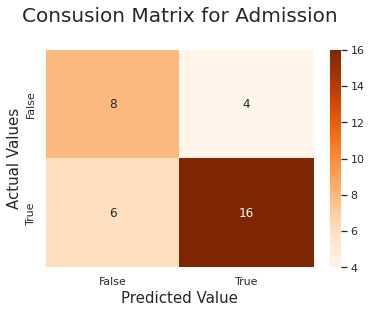

In [ ]:
# Can use heatmpa to visualize our Confusion Matrix
ax = sns.heatmap(cm, annot=True, cmap='Oranges')

ax.set_title('Consusion Matrix for Admission\n',fontsize=20)
ax.set_xlabel('Predicted Value',fontsize=15)
ax.set_ylabel('Actual Values',fontsize=15)

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

**The model did its job well - correctly predict the value**<br>
For 8 observations: The model predicted 0 and the true value was 0. (True Negative) <br>
For 16 observations: The model predicted 1 and the true values was 1.(True Positive) <br>

**The model got confused - incorrectly predict the value**<br>
For 6: False negative<br>
For 4: False positive <br>

In [ ]:
# Accuracy_score
acc_score = accuracy_score(y_test, prediction)
acc_score

0.7058823529411765

## Create ROC Curve

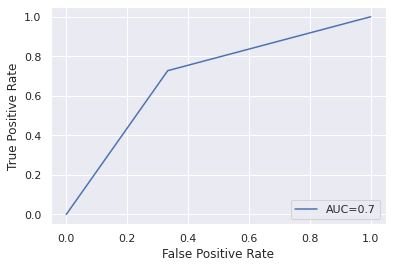

In [ ]:
# Import packages
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay


# Store points to fpr and tpr
fpr, tpr, _ = roc_curve(y_test, prediction)

# Get AUC score
auc = roc_auc_score(y_test, prediction)
auc = round(auc,2)

# Display the curve
roc_dis = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label='AUC='+ str(auc))

The model doesn't seem to have overfitting issue as its performance on the training dataset and on the testing dataset doesn't have big variant. However, as the AUC doesn't very high, we can try to improve the model predictive ability by, for example, conducting feature selection.